In [1]:
# 1. IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# 2. DATA LOADING
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/stocks.csv')

print("=" * 60)
print("STOCK MARKET ANALYSIS PROJECT")
print("=" * 60)
print("\n1. DATA OVERVIEW")
print("-" * 60)
print(f"Dataset Shape: {data.shape}")
print(f"\nFirst 5 rows:\n{data.head()}")
print(f"\nData Types:\n{data.dtypes}")
print(f"\nBasic Statistics:\n{data.describe()}")

STOCK MARKET ANALYSIS PROJECT

1. DATA OVERVIEW
------------------------------------------------------------
Dataset Shape: (248, 8)

First 5 rows:
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  

Data Types:
Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Basic Statistics:
             Open        High         Low       C

In [3]:
# 3. DATA PREPARATION & CLEANING

print("\n\n2. DATA PREPARATION")
print("-" * 60)

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print(f"Missing Values:\n{data.isnull().sum()}")

# Check for duplicates
print(f"\nDuplicate Rows: {data.duplicated().sum()}")

# Sort by Ticker and Date
data = data.sort_values(['Ticker', 'Date']).reset_index(drop=True)

# Get unique tickers
tickers = data['Ticker'].unique()
print(f"\nStocks in Dataset: {tickers}")



2. DATA PREPARATION
------------------------------------------------------------
Missing Values:
Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows: 0

Stocks in Dataset: ['AAPL' 'GOOG' 'MSFT' 'NFLX']


In [4]:
# 4. EXPLORATORY DATA ANALYSIS (EDA)


print("\n\n3. EXPLORATORY DATA ANALYSIS")
print("-" * 60)

# Basic statistics per ticker
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    print(f"\n{ticker} Statistics:")
    print(f"  Date Range: {ticker_data['Date'].min()} to {ticker_data['Date'].max()}")
    print(f"  Average Close Price: ${ticker_data['Close'].mean():.2f}")
    print(f"  Price Range: ${ticker_data['Close'].min():.2f} - ${ticker_data['Close'].max():.2f}")
    print(f"  Average Daily Volume: {ticker_data['Volume'].mean():,.0f}")



3. EXPLORATORY DATA ANALYSIS
------------------------------------------------------------

AAPL Statistics:
  Date Range: 2023-02-07 00:00:00 to 2023-05-05 00:00:00
  Average Close Price: $158.24
  Price Range: $145.31 - $173.57
  Average Daily Volume: 60,282,958

GOOG Statistics:
  Date Range: 2023-02-07 00:00:00 to 2023-05-05 00:00:00
  Average Close Price: $100.63
  Price Range: $89.35 - $109.46
  Average Daily Volume: 30,725,373

MSFT Statistics:
  Date Range: 2023-02-07 00:00:00 to 2023-05-05 00:00:00
  Average Close Price: $275.04
  Price Range: $246.27 - $310.65
  Average Daily Volume: 30,848,353

NFLX Statistics:
  Date Range: 2023-02-07 00:00:00 to 2023-05-05 00:00:00
  Average Close Price: $327.61
  Price Range: $292.76 - $366.83
  Average Daily Volume: 6,471,732


In [5]:
# 5. FEATURE ENGINEERING


print("\n\n4. FEATURE ENGINEERING")
print("-" * 60)

# Calculate additional features for each ticker
for ticker in tickers:
    mask = data['Ticker'] == ticker

    # Daily Returns
    data.loc[mask, 'Daily_Return'] = data.loc[mask, 'Close'].pct_change() * 100

    # Moving Averages
    data.loc[mask, 'MA_7'] = data.loc[mask, 'Close'].rolling(window=7).mean()
    data.loc[mask, 'MA_14'] = data.loc[mask, 'Close'].rolling(window=14).mean()
    data.loc[mask, 'MA_30'] = data.loc[mask, 'Close'].rolling(window=30).mean()

    # Volatility (Rolling Standard Deviation)
    data.loc[mask, 'Volatility_7'] = data.loc[mask, 'Close'].rolling(window=7).std()
    data.loc[mask, 'Volatility_14'] = data.loc[mask, 'Close'].rolling(window=14).std()

    # Price Range
    data.loc[mask, 'Daily_Range'] = data.loc[mask, 'High'] - data.loc[mask, 'Low']
    data.loc[mask, 'Price_Change'] = data.loc[mask, 'Close'] - data.loc[mask, 'Open']

print("New Features Created:")
print("  - Daily_Return: Daily percentage change")
print("  - MA_7, MA_14, MA_30: Moving averages")
print("  - Volatility_7, Volatility_14: Rolling volatility")
print("  - Daily_Range: High - Low")
print("  - Price_Change: Close - Open")



4. FEATURE ENGINEERING
------------------------------------------------------------
New Features Created:
  - Daily_Return: Daily percentage change
  - MA_7, MA_14, MA_30: Moving averages
  - Volatility_7, Volatility_14: Rolling volatility
  - Daily_Range: High - Low
  - Price_Change: Close - Open


In [6]:
# 6. TREND ANALYSIS


print("\n\n5. TREND ANALYSIS")
print("-" * 60)

for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].copy()

    # Overall trend
    first_price = ticker_data['Close'].iloc[0]
    last_price = ticker_data['Close'].iloc[-1]
    total_return = ((last_price - first_price) / first_price) * 100

    # Average daily return
    avg_daily_return = ticker_data['Daily_Return'].mean()

    # Volatility
    avg_volatility = ticker_data['Volatility_14'].mean()

    print(f"\n{ticker}:")
    print(f"  Total Return: {total_return:.2f}%")
    print(f"  Average Daily Return: {avg_daily_return:.2f}%")
    print(f"  Average Volatility (14-day): ${avg_volatility:.2f}")



5. TREND ANALYSIS
------------------------------------------------------------

AAPL:
  Total Return: 12.23%
  Average Daily Return: 0.20%
  Average Volatility (14-day): $2.89

GOOG:
  Total Return: -1.69%
  Average Daily Return: -0.01%
  Average Volatility (14-day): $2.71

MSFT:
  Total Return: 16.10%
  Average Daily Return: 0.26%
  Average Volatility (14-day): $6.99

NFLX:
  Total Return: -11.07%
  Average Daily Return: -0.17%
  Average Volatility (14-day): $11.28


In [7]:
# 7. CORRELATION ANALYSIS


print("\n\n6. CORRELATION ANALYSIS")
print("-" * 60)

# Create pivot table for closing prices
pivot_close = data.pivot_table(values='Close', index='Date', columns='Ticker')

# Calculate correlation matrix
correlation_matrix = pivot_close.corr()
print("\nCorrelation Matrix (Closing Prices):")
print(correlation_matrix)



6. CORRELATION ANALYSIS
------------------------------------------------------------

Correlation Matrix (Closing Prices):
Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.901662  0.953037  0.154418
GOOG    0.901662  1.000000  0.884527  0.201046
MSFT    0.953037  0.884527  1.000000  0.191273
NFLX    0.154418  0.201046  0.191273  1.000000




7. GENERATING VISUALIZATIONS
------------------------------------------------------------
✓ Comprehensive visualization saved as 'stock_market_analysis.png'


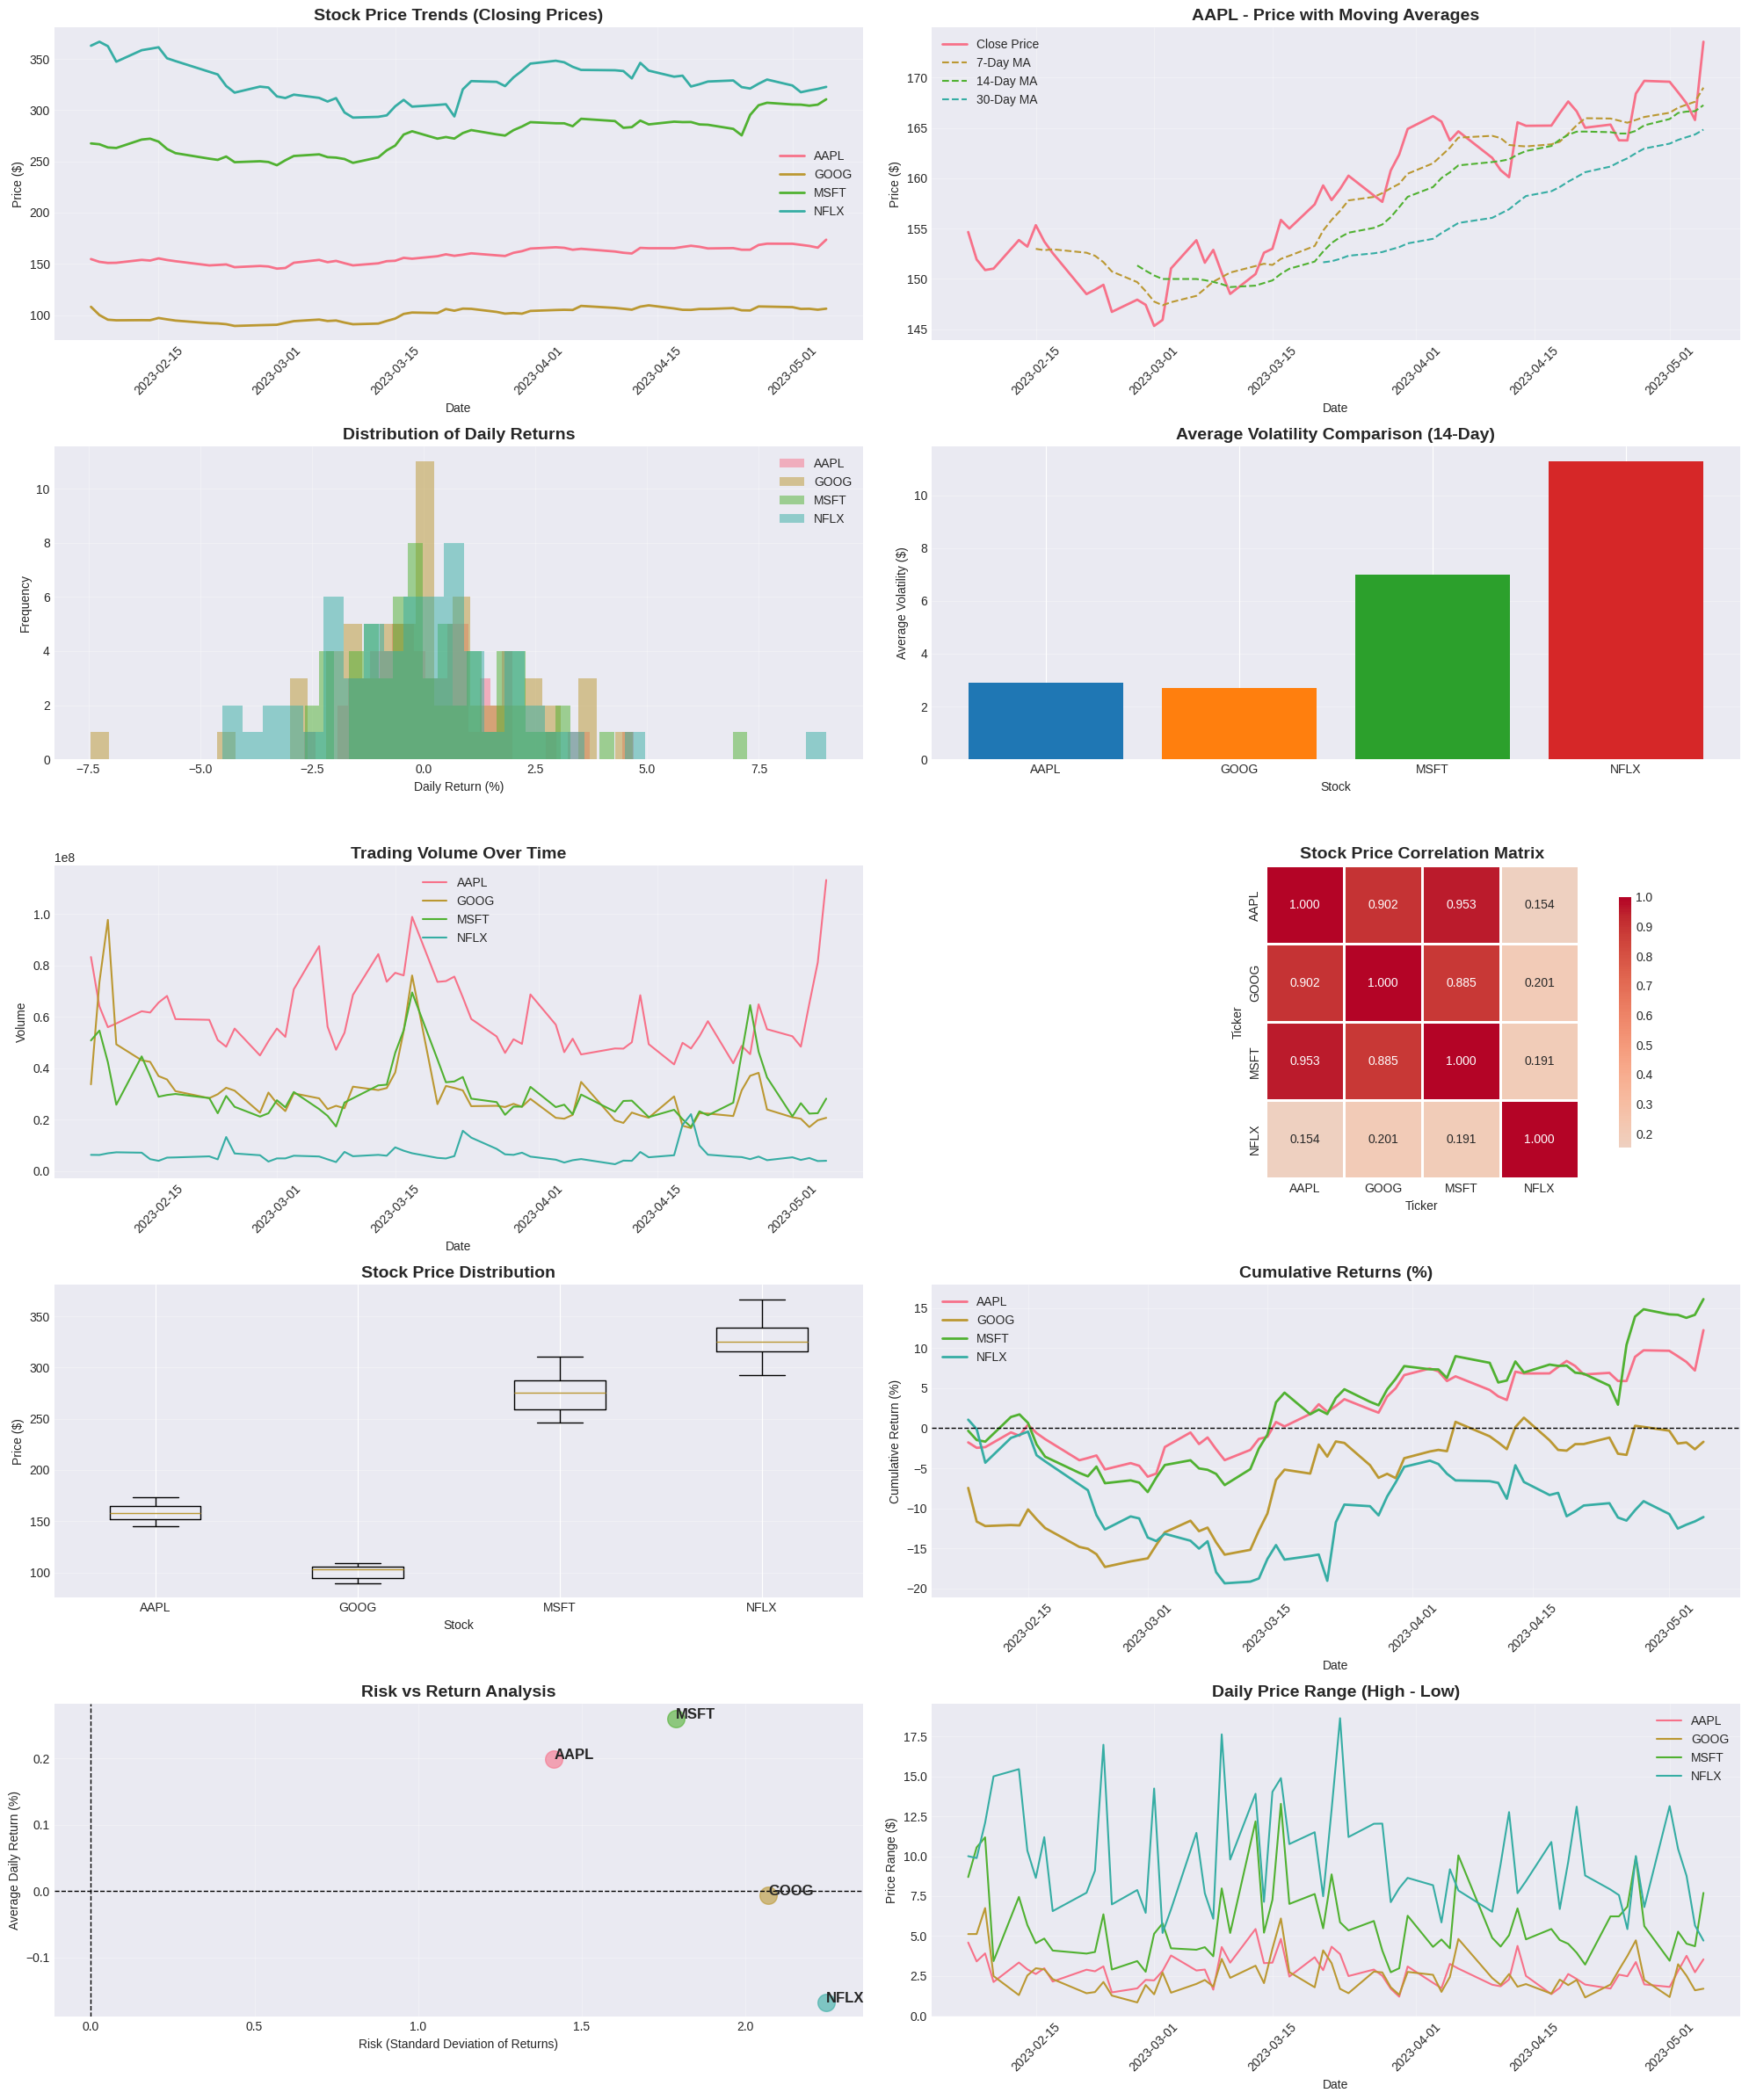

In [8]:
# 8. VISUALIZATION

print("\n\n7. GENERATING VISUALIZATIONS")
print("-" * 60)

# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 24))

# 1. Closing Price Trends
ax1 = plt.subplot(5, 2, 1)
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Close'], label=ticker, linewidth=2)
plt.title('Stock Price Trends (Closing Prices)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 2. Moving Averages (AAPL Example)
ax2 = plt.subplot(5, 2, 2)
aapl_data = data[data['Ticker'] == 'AAPL']
plt.plot(aapl_data['Date'], aapl_data['Close'], label='Close Price', linewidth=2)
plt.plot(aapl_data['Date'], aapl_data['MA_7'], label='7-Day MA', linewidth=1.5, linestyle='--')
plt.plot(aapl_data['Date'], aapl_data['MA_14'], label='14-Day MA', linewidth=1.5, linestyle='--')
plt.plot(aapl_data['Date'], aapl_data['MA_30'], label='30-Day MA', linewidth=1.5, linestyle='--')
plt.title('AAPL - Price with Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 3. Daily Returns Distribution
ax3 = plt.subplot(5, 2, 3)
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.hist(ticker_data['Daily_Return'].dropna(), alpha=0.5, bins=30, label=ticker)
plt.title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Volatility Comparison
ax4 = plt.subplot(5, 2, 4)
volatility_data = []
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    volatility_data.append(ticker_data['Volatility_14'].mean())
plt.bar(tickers, volatility_data, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Average Volatility Comparison (14-Day)', fontsize=14, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Average Volatility ($)')
plt.grid(True, alpha=0.3, axis='y')

# 5. Volume Analysis
ax5 = plt.subplot(5, 2, 5)
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Volume'], label=ticker, linewidth=1.5)
plt.title('Trading Volume Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 6. Correlation Heatmap
ax6 = plt.subplot(5, 2, 6)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Stock Price Correlation Matrix', fontsize=14, fontweight='bold')

# 7. Box Plot - Price Distribution
ax7 = plt.subplot(5, 2, 7)
close_prices = [data[data['Ticker'] == ticker]['Close'].values for ticker in tickers]
plt.boxplot(close_prices, labels=tickers)
plt.title('Stock Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Stock')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3, axis='y')

# 8. Cumulative Returns
ax8 = plt.subplot(5, 2, 8)
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].copy()
    ticker_data['Cumulative_Return'] = (1 + ticker_data['Daily_Return']/100).cumprod() - 1
    plt.plot(ticker_data['Date'], ticker_data['Cumulative_Return'] * 100,
             label=ticker, linewidth=2)
plt.title('Cumulative Returns (%)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xticks(rotation=45)

# 9. Risk vs Return Scatter
ax9 = plt.subplot(5, 2, 9)
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    avg_return = ticker_data['Daily_Return'].mean()
    risk = ticker_data['Daily_Return'].std()
    plt.scatter(risk, avg_return, s=200, alpha=0.6, label=ticker)
    plt.annotate(ticker, (risk, avg_return), fontsize=12, fontweight='bold')
plt.title('Risk vs Return Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Risk (Standard Deviation of Returns)')
plt.ylabel('Average Daily Return (%)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

# 10. High-Low Range Analysis
ax10 = plt.subplot(5, 2, 10)
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Daily_Range'], label=ticker, linewidth=1.5)
plt.title('Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price Range ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('stock_market_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Comprehensive visualization saved as 'stock_market_analysis.png'")





In [9]:
# 9. MACHINE LEARNING MODEL


print("\n\n8. MACHINE LEARNING - PRICE PREDICTION")
print("-" * 60)

# Prepare data for ML (using AAPL as example)
ml_data = data[data['Ticker'] == 'AAPL'].copy()
ml_data = ml_data.dropna()

# Select features
features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_14', 'Daily_Range']
target = 'Close'

X = ml_data[features]
y = ml_data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
print("\nLinear Regression Model:")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

print(f"  Mean Squared Error: {lr_mse:.4f}")
print(f"  Root Mean Squared Error: {lr_rmse:.4f}")
print(f"  R² Score: {lr_r2:.4f}")
print(f"  Mean Absolute Error: {lr_mae:.4f}")

# Train Random Forest Model
print("\nRandom Forest Model:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

print(f"  Mean Squared Error: {rf_mse:.4f}")
print(f"  Root Mean Squared Error: {rf_rmse:.4f}")
print(f"  R² Score: {rf_r2:.4f}")
print(f"  Mean Absolute Error: {rf_mae:.4f}")

# Feature Importance
print("\nFeature Importance (Random Forest):")
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(feature_importance)



8. MACHINE LEARNING - PRICE PREDICTION
------------------------------------------------------------

Linear Regression Model:
  Mean Squared Error: 0.4935
  Root Mean Squared Error: 0.7025
  R² Score: 0.9120
  Mean Absolute Error: 0.5965

Random Forest Model:
  Mean Squared Error: 1.2397
  Root Mean Squared Error: 1.1134
  R² Score: 0.7789
  Mean Absolute Error: 0.8292

Feature Importance (Random Forest):
       Feature  Importance
2          Low    0.375023
1         High    0.339635
0         Open    0.128720
5        MA_14    0.067313
6  Daily_Range    0.035456
4         MA_7    0.031404
3       Volume    0.022449


In [10]:
# 10. FINAL RESULTS & INSIGHTS


print("\n\n" + "=" * 60)
print("9. KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# Calculate performance metrics
performance_summary = []
for ticker in tickers:
    ticker_data = data[data['Ticker'] == ticker].copy()

    first_price = ticker_data['Close'].iloc[0]
    last_price = ticker_data['Close'].iloc[-1]
    total_return = ((last_price - first_price) / first_price) * 100
    avg_volatility = ticker_data['Volatility_14'].mean()
    avg_volume = ticker_data['Volume'].mean()
    max_price = ticker_data['Close'].max()
    min_price = ticker_data['Close'].min()

    performance_summary.append({
        'Ticker': ticker,
        'Start_Price': first_price,
        'End_Price': last_price,
        'Total_Return_%': total_return,
        'Avg_Volatility': avg_volatility,
        'Avg_Volume': avg_volume,
        'Max_Price': max_price,
        'Min_Price': min_price
    })

performance_df = pd.DataFrame(performance_summary)
print("\nPerformance Summary:")
print(performance_df.to_string(index=False))

# Best performing stock
best_stock = performance_df.loc[performance_df['Total_Return_%'].idxmax()]
print(f"\n✓ Best Performing Stock: {best_stock['Ticker']} with {best_stock['Total_Return_%']:.2f}% return")

# Most volatile stock
most_volatile = performance_df.loc[performance_df['Avg_Volatility'].idxmax()]
print(f"✓ Most Volatile Stock: {most_volatile['Ticker']} with ${most_volatile['Avg_Volatility']:.2f} avg volatility")

# Highest volume
highest_volume = performance_df.loc[performance_df['Avg_Volume'].idxmax()]
print(f"✓ Highest Trading Volume: {highest_volume['Ticker']} with {highest_volume['Avg_Volume']:,.0f} avg volume")

print("\n" + "=" * 60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 60)
print("\nOutputs Generated:")
print("  1. Comprehensive data analysis")
print("  2. Visualization plots (stock_market_analysis.png)")
print("  3. Machine learning predictions")
print("  4. Performance summary report")
print("\n" + "=" * 60)



9. KEY INSIGHTS & RECOMMENDATIONS

Performance Summary:
Ticker  Start_Price  End_Price  Total_Return_%  Avg_Volatility   Avg_Volume  Max_Price  Min_Price
  AAPL   154.649994 173.570007       12.234086        2.892004 6.028296e+07 173.570007 145.309998
  GOOG   108.040001 106.214996       -1.689193        2.713844 3.072537e+07 109.459999  89.349998
  MSFT   267.559998 310.649994       16.104798        6.993036 3.084835e+07 310.649994 246.270004
  NFLX   362.950012 322.760010      -11.073151       11.281713 6.471732e+06 366.829987 292.760010

✓ Best Performing Stock: MSFT with 16.10% return
✓ Most Volatile Stock: NFLX with $11.28 avg volatility
✓ Highest Trading Volume: AAPL with 60,282,958 avg volume

PROJECT COMPLETED SUCCESSFULLY!

Outputs Generated:
  1. Comprehensive data analysis
  2. Visualization plots (stock_market_analysis.png)
  3. Machine learning predictions
  4. Performance summary report

